# **Usando Machine Learning KNN (K-Vizinhos Mais Próximos) para Resolver Problemas**

O principal objetivo deste _Notebook_ é demonstrar as melhores práticas para resolver um problema usando o algoritmo de aprendizado de máquina supervisionado KNN (K-Vizinhos Mais Próximos).

Para cumprir esse objetivo, o conjunto de dados **IRIS** é utilizado, um conjunto de dados muito comum para cientistas de dados em testes e estudos de **ML** (Machine Learning). Além disso, este é um conjunto de dados incorporado nas bibliotecas ***Scikit-Learn*** ou ***Seaborn***.


> # **Conjunto de Dados Iris**
* Iris é um gênero de espécies de plantas com flores vistosas.
* As espécies de iris estudadas aqui, **setosa**, **versicolor** e **virginica**, compartilham uma cor semelhante: violeta/azul escuro.
* Uma maneira de distinguir visualmente as espécies entre si é por meio das dimensões de suas pétalas e sépalas (comprimento e largura).

> **O primeiro passo é importar a biblioteca _Seaborn_ e, em seguida, carregar o conjunto de dados iris a partir dela.**

Diferentemente do Scikit-Learn, que carrega o conjunto de dados como arrays, o Seaborn o carrega como um Dataframe do Pandas, o que economiza algumas etapas na construção do Dataframe e, consequentemente, algumas linhas de código.

In [1]:
import seaborn as sns
iris = sns.load_dataset("iris")

In [2]:
type(iris)

pandas.core.frame.DataFrame

O método **sample** de um Dataframe do Pandas é uma ótima maneira de visualizar como os dados são armazenados, como as características e o tipo de dados delas, com amostras aleatórias do Dataframe, não ordenadas.

In [4]:
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
95,5.7,3.0,4.2,1.2,versicolor
16,5.4,3.9,1.3,0.4,setosa
125,7.2,3.2,6.0,1.8,virginica
90,5.5,2.6,4.4,1.2,versicolor
58,6.6,2.9,4.6,1.3,versicolor


Existem 4 categorias listadas: "comprimento da sépala (cm)", "largura da sépala (cm)", "comprimento da pétala (cm)" e "largura da pétala (cm)".

In [6]:
from IPython.display import Image
Image(filename ="iris-data-set.png", width=500, height=350)

FileNotFoundError: [Errno 2] No such file or directory: 'iris-data-set.png'

> **Para realizar algumas verificações adicionais no Dataframe, a própria biblioteca Pandas deve ser importada.**
Antes de iniciar qualquer trabalho mais aprofundado em qualquer dado, é essencial fazer uma análise preliminar dos dados: os tipos de dados, seus tamanhos, algumas medidas estatísticas, valores ausentes. Em seguida, tirar as primeiras conclusões e corrigir qualquer problema de forma adequada.

*isso não é o caso desses dados bem conhecidos, mas as verificações devem ser realizadas de qualquer maneira.

In [7]:
import pandas as pd

In [8]:
pd.value_counts(iris.species)

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

The dataset is made of 150 flowers (150 rows), 50 of each specie.

> **As características estatísticas básicas das colunas numéricas.**

Através do método **describe**, podemos obter a média, desvio padrão, valor máximo e mínimo, além dos percentis para cada uma das características.

In [9]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


É evidente que cada característica se contrasta com as outras. No entanto, neste momento, os dados das 3 espécies estão agrupados e uma forma gráfica é mais adequada para uma análise exploratória.

O método **info** fornece informações extras sobre o dataframe e o tipo de dado de cada coluna:
* as características que são dimensões do tipo float64
* o alvo, ou espécie, do tipo objeto

In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


O método **isnull** combinado com o método **sum** retorna se há algum valor nulo no dataframe que deve ser tratado, caso contrário, poderia implicar na impossibilidade de aplicar qualquer algoritmo de aprendizado de máquina.

In [11]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

> # **Análise Exploratória por Meio de Gráficos**

**Seaborn** é uma biblioteca de visualização de dados em Python baseada no **Matplotlib**. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos.

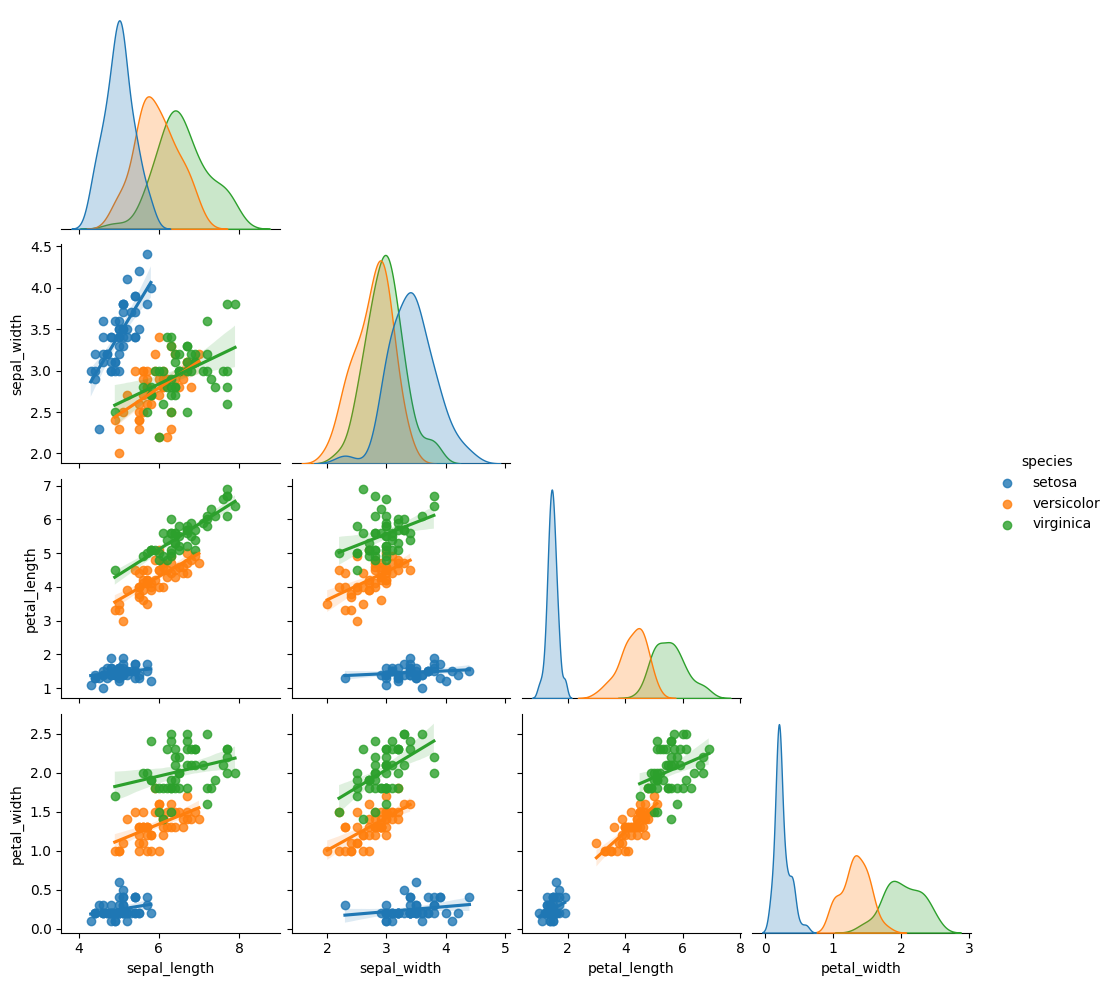

In [12]:
sns.pairplot(iris, hue="species", corner=True, kind='reg')

> ## **Identificação da Setosa**

**Iris-setosa**, **iris-virginica** e **iris-versicolor** têm a mesma cor violeta/azul. Uma maneira de distinguir as espécies é analisando as dimensões das pétalas e sépalas, bem como as proporções entre elas. Juntamente com uma análise exploratória dos dados, é possível obter informações valiosas e algumas conclusões. A seguir.

Como visto nos gráficos acima, os dados da **iris-setosa** são muito distintos das outras duas espécies. Com uma distribuição de dados assim, é esperado que qualquer bom algoritmo de aprendizado de máquina preditivo tenha uma alta precisão, talvez 100%. Ou melhor, para a classificação dessa espécie em relação às outras duas, **basta verificar as dimensões da pétala**; se o comprimento for de até 2 cm ou a largura for de até 0,7 cm, com certeza é uma iris-setosa.

In [13]:
print('O comprimento máximo da pétala da Setosa nesta amostra do conjunto de dados é de', iris.loc[iris.species=='setosa'].max().petal_length, 'cm, enquanto para as outras espécies, o comprimento mínimo é de', iris.loc[(iris.species=='virginica') | (iris.species=='versicolor')].min().petal_length, 'cm.\nEm relação à largura da pétala, a Setosa tem uma largura máxima de', iris.loc[iris.species=='setosa'].max().petal_width, 'cm, enquanto as outras espécies têm uma largura mínima de', iris.loc[(iris.species=='virginica') | (iris.species=='versicolor')].min().petal_width, 'cm.')

O comprimento máximo da pétala da Setosa nesta amostra do conjunto de dados é de 1.9 cm, enquanto para as outras espécies, o comprimento mínimo é de 3.0 cm.
Em relação à largura da pétala, a Setosa tem uma largura máxima de 0.6 cm, enquanto as outras espécies têm uma largura mínima de 1.0 cm.


In [14]:
from IPython.display import display
p_l = pd.pivot_table(iris, values=['petal_length'], index=['species'],aggfunc=[min,max], margins=False)
p_w = pd.pivot_table(iris, values=['petal_width'], index=['species'],aggfunc=[min,max], margins=False)
P_L = pd.DataFrame(p_l.to_records())
P_W = pd.DataFrame(p_w.to_records())
display(P_L),display(P_W)


,species,"('min', 'petal_length')","('max', 'petal_length')"
0,setosa,1.0,1.9
1,versicolor,3.0,5.1
2,virginica,4.5,6.9


,species,"('min', 'petal_width')","('max', 'petal_width')"
0,setosa,0.1,0.6
1,versicolor,1.0,1.8
2,virginica,1.4,2.5


(None, None)

> ## **Identificação de Virginica e Versicolor**

Das outras duas espécies. Os dados de **iris-versicolor** e **iris-virginica**, ao mesmo tempo que são semelhantes, é notória uma clara distribuição normal para todas as suas dimensões, exceto pela largura da sépala, que é quase a mesma para ambas as espécies. Devido a isso, é possível distinguir com um alto percentual de precisão quando se refere às seguintes relações:

* Comprimento da Pétala **vs** Comprimento da Sépala ou Largura da Sépala
* Largura da Pétala **vs** Largura da Sépala ou Largura da Sépala ou Comprimento da Pétala

A única relação que é quase a mesma, e que não permite concluir, por meio de uma análise exploratória, qual espécie está entre essas duas, são as dimensões e proporções entre comprimento e largura:

* Comprimento da Sépala **vs** Largura da Sépala

Um algoritmo de Aprendizado de Máquina é de grande utilidade para essa classificação, reduzindo qualquer erro humano ao comparar todas essas dimensões e relações.

Ambos os algoritmos usados para a classificação nessa questão são ideais para esse tipo de análise de dados.

Eles têm algumas diferenças que podem ser consideradas simplesmente suas características.

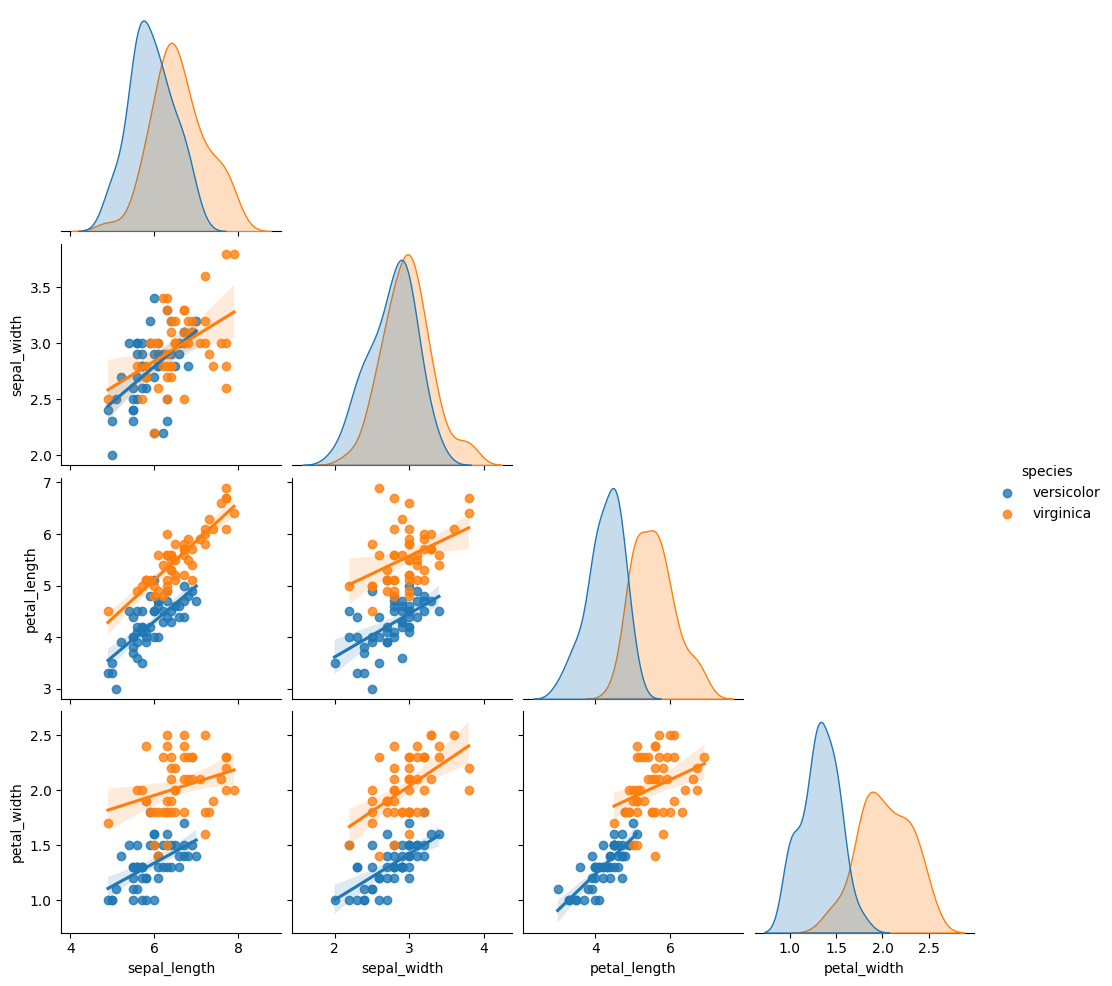

In [15]:
sns.pairplot(iris.loc[(iris.species=='virginica') | (iris.species=='versicolor')], hue="species", corner=True, kind='reg')

É claro que a maioria das flores podem ter sua espécie identificada, mas algumas podem representar um desafio. Por que não usar aprendizado de máquina para ajudar nessa tarefa?

# **APRENDIZAGEM DE MÁQUINA - Análise Preditiva**

Após **realizar a análise exploratória**, que basicamente consiste em avaliar e chegar a algumas conclusões com base nos gráficos de distribuição e dispersão dos dados.

Agora, a análise preditiva será realizada não por uma pessoa, mas com a ajuda de um computador, algoritmos matemáticos, **aprendizado de máquina**.

O problema será resolvido através do algoritmo **KNN**. As melhores práticas serão aplicadas e explicadas.

O Scikit-learn é a biblioteca usada aqui para aprendizado de máquina em Python. Dessa biblioteca, vários módulos são importados conforme necessário.

> *Scikit-learn é uma biblioteca de aprendizado de máquina de código aberto que suporta aprendizado supervisionado e não supervisionado. Ele também fornece várias ferramentas para ajuste de modelo, pré-processamento de dados, seleção e avaliação de modelo, e muitas outras utilidades.*

> # **Dados de TREINAMENTO e TESTE**

O primeiro passo para realizar uma análise preditiva através de um algoritmo de Aprendizado de Máquina é separar os dados em duas partes. Uma delas será usada para ser **treinada**, de modo que os coeficientes sejam calculados para melhor se ajustarem a esses dados, de acordo com o algoritmo escolhido. A segunda parte é reservada para ser **testada**, permitindo assim ***avaliar a precisão*** do método com dados diferentes, de forma que seja possível fazer extrapolações para qualquer dado.

> Essa seleção, de qual parte dos dados será usada como treinamento e teste, é muito importante. Vamos usar **70% para treinamento** e **30% para teste**. É importante não escolher dados enviesados e fazer a seleção de forma aleatória.

> O ***Scikit-learn*** tem um método muito bom para isso, chamado **train_test_split**. No entanto, toda vez que você executa esse método, ele retorna amostras diferentes, pois é feito de forma aleatória, o que tornaria impossível replicar o mesmo problema. A seleção dos dados pode produzir resultados ligeiramente diferentes para o algoritmo.

> O ***Pandas*** tem uma solução para isso, através de uma divisão aleatória com semente (seed) do banco de dados. O método **sample** configurado com **random_state=500** torna possível a replicação por qualquer pessoa. Você está livre para testar com um número diferente, ou até mesmo usar o *train_test_split*.

> O resultado final é:

>> *   **X_train** e **y_train** **-** para treinamento, dados e alvo, respectivamente
>> *   **X_test** **-** dados para previsão com o algoritmo
>> *   **y_test** **-** alvo para validar o modelo

In [16]:
# from sklearn.datasets import load_iris

# iris = load_iris()
# X = iris['data']
# y = iris['target']

In [22]:
train = iris.sample(frac=0.7, random_state=500)

In [23]:
test = iris.drop(train.index)

In [24]:
X_train = train.drop(labels='species', axis=1)

In [25]:
y_train = train.species

In [26]:
X_test = test.drop(labels='species', axis=1)

In [27]:
y_test = test.species

> **Mais tarde foi verificado na documentação e o método train_test_split também possui um método de divisão aleatória com semente (seed), porém não é o mesmo, então a mesma semente representa dados diferentes do método de amostragem do Pandas.

> Segue a opção de uso do train_test_split: código simples em uma linha:

```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.drop('species', axis=1), iris['species'], test_size=0.3, random_state=1)
```

Nesse código, `iris.drop('species', axis=1)` representa os dados de entrada `X` sem a coluna `'species'`, enquanto `iris['species']` representa o alvo `y`. A divisão é feita em uma proporção de 70% para treinamento (`X_train` e `y_train`) e 30% para teste (`X_test` e `y_test`). A semente (`random_state`) é definida como 1 para garantir a replicabilidade dos resultados.

> Segue um exemplo das primeiras 5 linhas dos dados de treinamento após a divisão:

```
     sepal_length  sepal_width  petal_length  petal_width
22            4.6          3.6           1.0          0.2
15            5.7          4.4           1.5          0.4
65            6.7          3.1           4.4          1.4
11            4.8          3.4           1.6          0.2
42            4.4          3.2           1.3          0.2
```

Cada vez que o método `train_test_split` é executado, uma amostra diferente é selecionada aleatoriamente para os conjuntos de teste e treinamento. Isso significa que, cada vez que você tem um conjunto de treinamento diferente, o desempenho do modelo pode ser diferente. Para minimizar esse problema, são recomendadas algumas técnicas de treinamento/teste com diferentes partes do conjunto de dados, isso é chamado de **validação cruzada** e será usado posteriormente.

In [28]:
print(X_train.head(),"\n", y_train.head())

     sepal_length  sepal_width  petal_length  petal_width
7             5.0          3.4           1.5          0.2
126           6.2          2.8           4.8          1.8
136           6.3          3.4           5.6          2.4
133           6.3          2.8           5.1          1.5
66            5.6          3.0           4.5          1.5 
 7          setosa
126     virginica
136     virginica
133     virginica
66     versicolor
Name: species, dtype: object


> Em seguida, temos as formas (shapes) dos dados divididos:

- X_train: (105, 4)
- y_train: (105,)
- X_test: (45, 4)
- y_test: (45,)

Isso significa que:

- X_train contém 105 amostras de treinamento, com 4 características cada.
- y_train contém 105 rótulos de treinamento correspondentes.
- X_test contém 45 amostras de teste, com 4 características cada.
- y_test contém 45 rótulos de teste correspondentes.

Essas formas indicam o número de instâncias (amostras) e o número de características (atributos) em cada conjunto de dados.

In [29]:
X_train.shape,X_test.shape

((105, 4), (45, 4))

In [30]:
y_train.shape,y_test.shape

((105,), (45,))

# **KNN - K Nearest Neighbors**

No reconhecimento de padrões, o algoritmo k-vizinhos mais próximos (k-NN) é um método não paramétrico usado para classificação e regressão. Em ambos os casos, a entrada consiste nos k exemplos de treinamento mais próximos no espaço de características. A saída depende se o k-NN é usado para classificação ou regressão:

- Na classificação k-NN, a saída é uma associação de classe. Um objeto é classificado por meio de uma votação da maioria de seus vizinhos, sendo o objeto atribuído à classe mais comum entre seus k vizinhos mais próximos (k é um número inteiro positivo, normalmente pequeno). Se k = 1, então o objeto é simplesmente atribuído à classe desse único vizinho mais próximo.

Essa é uma breve explicação sobre o algoritmo k-NN. Ele é amplamente utilizado em aprendizado de máquina para realizar tarefas de classificação e regressão com base na proximidade dos exemplos de treinamento.

*fonte [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm). 

> ## **Instanciando o Algoritmo KNN**

O classificador KNN (KNeighborsClassifier) é importado do Scikit-learn.

O **KNeighborsClassifier** possui alguns parâmetros que podem ser ajustados para melhorar seu desempenho. Inicialmente, apenas o parâmetro n_neighbors será definido, enquanto os demais permanecerão com seus valores padrão. Mais tarde, pode-se realizar uma análise de otimização para ajustar esses parâmetros.

Aqui está um exemplo de como instanciar o algoritmo KNN com o parâmetro n_neighbors definido:

```python
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
```

Neste exemplo, definimos `n_neighbors` como 5, o que significa que o algoritmo considerará os 5 vizinhos mais próximos ao fazer previsões. Você pode ajustar esse valor com base no seu problema específico e conjunto de dados.

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=3)

n_neighbors é definido como 3, o que significa que ele considerará a classificação da espécie com base na média das três observações mais próximas.

> ## **Treinando o algoritmo KNN**

Nesta etapa, o algoritmo é treinado para estimar a melhor função representativa para os dados, de acordo com os parâmetros utilizados.

**Fit** é o método utilizado para ajustar o classificador aos dados.

In [33]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Antes de fazer a previsão dos resultados, é possível obter a média estimada de acurácia nos dados de teste e rótulos fornecidos.

In [34]:
knn.score(X_test,y_test)

0.9555555555555556

> ## **Prevendo com os Dados de Teste e o Algoritmo KNN**

Com o algoritmo treinado e a função estabelecida, é possível obter os primeiros resultados prevendo os dados de teste (X_test).

**Predict** é o método utilizado para inferir resultados a partir de qualquer dado compatível com os dados de treinamento.

In [35]:
results = knn.predict(X_test)

Esta é a lista das espécies de íris previstas para as 45 amostras do conjunto de dados **X_test**. Para validar a função, o resultado deve ser comparado com os valores autênticos representados por **y_test**.

># **Validation**

Técnicas para calcular e melhorar a precisão e outras métricas de desempenho.

> ## **Cross Tabulation**

O método de Tabulação Cruzada é usado para verificar se todas as flores de uma espécie específica são previstas corretamente, a recall; e para verificar se uma espécie específica prevista corresponde à espécie real, a precisão.

In [36]:
print(pd.crosstab(y_test, results, rownames=['Real'], colnames=['Predicted'], margins=True, margins_name='total'))

Predicted   setosa  versicolor  virginica  total
Real                                            
setosa          12           0          0     12
versicolor       0          20          2     22
virginica        0           0         11     11
total           12          20         13     45


Com essa separação dos dados de treinamento e teste, a tabela de resultados é como mostrada acima.

Para compreender melhor a definição de recall e precisão, vamos avaliar os resultados da espécie **VIRGINICA**:

* A espécie é claramente identificada, pois todas foram identificadas corretamente. Isso é chamado de recall de 100%.

* Por outro lado, não podemos dizer que é preciso, junto com uma precisão de 100%, pois das 13 previsões de virginica, duas delas eram, na verdade, versicolor.

A seguir, essas métricas são calculadas.

> ## **Métricas de Classificação**

Com as **métricas**, a **precisão** e o **recall** calculados para cada espécie são apresentados em formato de tabela.

O **f1-score** representa uma média ponderada entre essas duas métricas. Essa é uma ótima métrica por não levar em consideração os verdadeiros negativos, que geralmente são irrelevantes para os resultados.

A precisão mostra a fidelidade do algoritmo de maneira geral.

In [37]:
from sklearn import metrics

In [38]:
print(metrics.classification_report(y_test,results,target_names=iris.species.unique(), digits=3))

              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        12
  versicolor      1.000     0.909     0.952        22
   virginica      0.846     1.000     0.917        11

    accuracy                          0.956        45
   macro avg      0.949     0.970     0.956        45
weighted avg      0.962     0.956     0.956        45



A precisão mostrada é a mesma do score do método KNN, que é de 95,6%.

> ## **Validação Cruzada**

Como discutido anteriormente, na seção de **Dados de Treinamento e Teste**, a seleção dos dados a serem usados nessas duas partes importantes do aprendizado de máquina supervisionado pode alterar a eficiência do modelo. Em outras palavras, diferentes dados de treinamento significam um algoritmo ajustado diferente, resultando em previsões diferentes que podem levar a métricas diferentes.

Isso ocorre mesmo mantendo os parâmetros constantes, apenas variando as amostras selecionadas.

Para minimizar esse problema, uma boa solução é usar o método de **Validação Cruzada**, que divide os dados de treinamento em **n** partes (neste caso, n = 5) e repete a análise de **ajuste** e **previsão** **n** vezes, utilizando em cada vez a quantidade de dados reduzida em uma parte.

É quase como se estivéssemos selecionando conjuntos de dados diferentes para o treinamento, porém em menor escala. Para obter mais detalhes sobre como esse método funciona, consulte a documentação oficial.

A validação cruzada otimiza as métricas escolhidas (neste caso, a precisão), reduzindo o risco de **overfitting**, no qual o classificador funciona muito bem com os dados de treinamento, mas não com os de teste, ao **averiguar** as métricas resultantes de cada iteração.


In [39]:
from sklearn.model_selection import cross_val_score

Como discutido anteriormente, o desempenho do classificador depende dos dados de treinamento e teste selecionados. Dos dados selecionados com random_state=500, a precisão obtida foi de 95,6%.

In [41]:
var="%"

print("Accuracy: %0.1f" % (knn.score(X_test,y_test)*100), var[0])

Accuracy: 95.6 %


In [42]:
scores = cross_val_score(knn, iris.drop('species',axis=1), iris.species, cv=5, scoring='accuracy')
scores

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

Com a validação cruzada, é possível observar que o desempenho pode variar de 93% a 100%. Portanto, o desempenho do classificador é considerado como a média da validação cruzada. Neste caso, é de 96,7% +/- 2,1%.

In [44]:
var="%", print("Acurácia para Validação Cruzada: %0.1f" % (scores.mean()*100),var[0],"(+/- %0.1f)" % (scores.std() * 100), var[0])

Acurácia para Validação Cruzada: 96.7 % (+/- 2.1) %


Se você pretende testar outros parâmetros para o seu classificador, essas métricas de desempenho são muito melhores, pois reduzem os erros devido à seleção específica de divisão dos dados para treinamento e teste.

># **Otimizando o Parâmetro K (n_neighbors)**

> ## **Definindo uma Lista para o Parâmetro K**

É possível otimizar os parâmetros de um classificador usando o objeto **GridSearch**.

Para a classificação dos melhores parâmetros, as métricas de Validação Cruzada se mostram muito úteis pelas razões explicadas anteriormente.

O **parâmetro K** do KNN foi inicialmente definido como 3 sem critérios específicos.

Esse parâmetro será otimizado. Inicialmente, é criada uma lista de possíveis fatores k, de 1 a 30.

In [45]:
k_list = list(range(1,31))

In [46]:
k_values = dict(n_neighbors=k_list)
print(k_values.keys()),
print(k_values.values())

dict_keys(['n_neighbors'])
dict_values([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]])


> ## **Instanciando o objeto GridSearch**

O objeto **GridSearch** realiza uma busca exaustiva por valores de parâmetros especificados para um estimador.

Seu processo executa os métodos **fit** e **predict**, juntamente com a estratégia de **Validação Cruzada**.

Os parâmetros do estimador usados para aplicar esses métodos são otimizados por meio de uma busca em grade com validação cruzada.

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
grid = GridSearchCV(knn, k_values, cv=5, scoring='accuracy')

> ## **Training the GridSearch Object**

In [59]:
grid.fit(iris.drop('species', axis=1), iris.species)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

> ## **Verificando os Scores**

É hora de verificar o desempenho do classificador em relação a todos os parâmetros listados para o objeto GridSearch.

In [60]:
# grid.cv_results_
grid_table = pd.DataFrame(grid.cv_results_)
grid_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001417,0.000228,0.003328,0.000601,1,{'n_neighbors': 1},0.966667,0.966667,0.933333,0.933333,1.0,0.960000,0.024944,19
1,0.001330,0.000156,0.003000,0.000411,2,{'n_neighbors': 2},0.966667,0.933333,0.933333,0.900000,1.0,0.946667,0.033993,26
2,0.001059,0.000068,0.002380,0.000114,3,{'n_neighbors': 3},0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,10
3,0.001025,0.000031,0.002294,0.000042,4,{'n_neighbors': 4},0.966667,0.966667,0.966667,0.966667,1.0,0.973333,0.013333,6
4,0.000998,0.000004,0.002288,0.000061,5,{'n_neighbors': 5},0.966667,1.000000,0.933333,0.966667,1.0,0.973333,0.024944,6


O método `cv_results_` lista várias métricas com base na precisão do classificador KNN com diferentes valores de K (número de vizinhos), desde a duração do tempo até a melhor precisão em si.

In [62]:
for key in grid.cv_results_.keys():
  print(key) 

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_n_neighbors
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score


In [64]:
grid_table_rank = grid_table[['params','mean_test_score','std_test_score','rank_test_score']].loc[grid_table['rank_test_score']==1].sort_values(by='std_test_score', ascending=True)
grid_table_rank

,params,mean_test_score,std_test_score,rank_test_score
5,{'n_neighbors': 6},0.98,0.016330,1
6,{'n_neighbors': 7},0.98,0.016330,1
9,{'n_neighbors': 10},0.98,0.026667,1
10,{'n_neighbors': 11},0.98,0.026667,1
11,{'n_neighbors': 12},0.98,0.026667,1


> A melhor precisão com o menor valor de K é a seguinte: 

In [65]:
best_accuracy = grid.best_score_
best_k = grid.best_params_['n_neighbors']

print("Melhor precisão:", best_accuracy)
print("Melhor valor de K:", best_k)


Melhor precisão: 0.9800000000000001
Melhor valor de K: 6


Também é possível verificar o desvio padrão mais baixo entre as classificações em primeiro lugar.

```python
lowest_std = grid.cv_results_['std_test_score'][grid.cv_results_['rank_test_score'] == 1][0]
print("Desvio padrão mais baixo entre as classificações em primeiro lugar:", lowest_std)
```

Isso retornará o valor do desvio padrão mais baixo entre as classificações classificadas em primeiro lugar.

In [66]:
lowest_std = grid.cv_results_['std_test_score'][grid.cv_results_['rank_test_score'] == 1][0]
print("Desvio padrão mais baixo entre as classificações em primeiro lugar:", lowest_std)

Desvio padrão mais baixo entre as classificações em primeiro lugar: 0.016329931618554516


```python
best_classifier = grid.best_estimator_
print("Melhor classificador:")
print(best_classifier)
```

Isso retornará o melhor classificador com seus parâmetros otimizados.

In [69]:
best_classifier = grid.best_estimator_
print("Melhor classificador:")
print(best_classifier)

Melhor classificador:
KNeighborsClassifier(n_neighbors=6)


> ## **Gráficos**

Graficamente, a lista de resultados dos K números de vizinhos _versus_ a acurácia.

In [71]:
import matplotlib.pyplot as plt

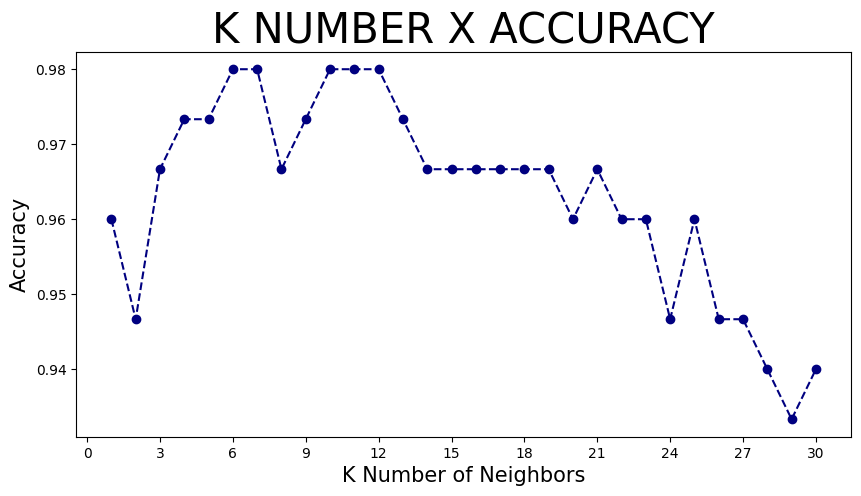

In [72]:
graphic = grid.cv_results_['mean_test_score']
graphic

plt.figure(figsize=(10,5))
plt.plot(k_list,graphic,color='navy',linestyle='dashed',marker='o')
plt.xlabel('K Number of Neighbors', fontdict={'fontsize': 15})
plt.ylabel('Accuracy', fontdict={'fontsize': 15})
plt.title('K NUMBER X ACCURACY', fontdict={'fontsize': 30})
plt.xticks(range(0,31,3),)
#plt.xaxis.set_major_locator(MultipleLocator(3))
plt.show()

# **Conclusions and Next Steps**

The issue is exaustive, other parameters should be tested with the **GridSearch Object**. However this database is very simple and these changes could indicate no differ.

For sure, the best way for performing the optimization with these sensibility analysis, is through **Pipelines**.

The next article is programmed to be about the **SVM (Support Vectors Machine)** Machine Learning Algorithm for classifiation, where I would solve the same problem discussed herein in a shorter way going direct to the classifier laying aside the exploratory analysis and the sample selection, accomplishing the optimization along Pipelines.

Later, a comparison between these two approaches (**KNN x SVM**) is of great concern, to confront which performs better to this problem. Or at least, more appropriately. Checking how both works. 

# **Acknowledgment**

This article had the collaboration of some data scientist colleagues:

*   Karinne Cristina, [Tutor of Minerando's Data Science do Zero](https://www.linkedin.com/in/rodrigo-santana-ferreira-0ab041128/)
*   Maykon Schots, [Data Scientist at Volvo Group](https://www.linkedin.com/in/maykon-schots-a543b49/)
*   Plínio Mendes, [Software Engineer at Google](https://www.linkedin.com/in/pliniofm/)
*   Rodringo Santana, [Co-Founder of Minerando Dados](https://www.linkedin.com/in/rodrigo-santana-ferreira-0ab041128/)



